# DB 데이터 가져오기

In [1]:
import pymysql

conn = pymysql.connect(host= '127.0.0.1', 
                        user = 'root', 
                        password='1234',
                        db = 'project1', 
                        port=3307,
                        charset='utf8')

cur = conn.cursor()

cur.execute("SELECT * FROM covid_7days")

7

In [2]:
TodayDate = []
total = []
local = []
oversea = []

In [3]:
while(True):
    row = cur.fetchone()
    if row == None :
        break
    TodayDate.append(row[0])
    total.append(row[1])
    local.append(row[2])
    oversea.append(row[3])

In [4]:
print(TodayDate)
print(total)
print(local)
print(oversea)

[datetime.date(2021, 8, 18), datetime.date(2021, 8, 19), datetime.date(2021, 8, 20), datetime.date(2021, 8, 21), datetime.date(2021, 8, 22), datetime.date(2021, 8, 23), datetime.date(2021, 8, 24)]
[2152, 2050, 1879, 1626, 1417, 1508, 2155]
[2114, 1999, 1813, 1588, 1369, 1469, 2114]
[38, 51, 66, 38, 48, 39, 41]


### DF로 변환

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({
    'TodayDate' : TodayDate,
    'total': total,
    'local': local,
    'oversea': oversea
})

# 시각화

In [7]:
import matplotlib.pyplot as plt

In [8]:
# 예제 3-52 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

# 일별 신규 확진자수
- 일주일 통계

In [55]:
colors = []
for data in df['local']:
    if data > 2000 :
        colors.append('sandybrown')
    elif data > 1750 :
        colors.append('wheat')
    elif data > 1500 :
        colors.append('oldlace')
    else: 
        colors.append('floralwhite')

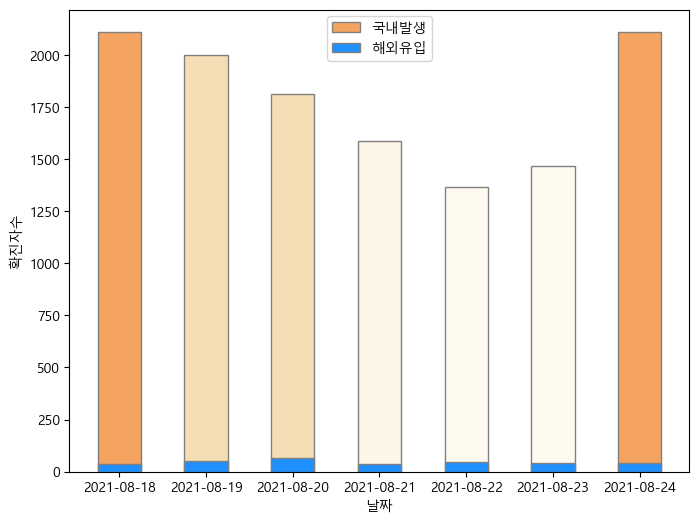

In [64]:
plt.figure(figsize=(8,6))
plt.bar(df['TodayDate'], df['local'], width = 0.5, label = '국내발생', 
        color = colors, edgecolor = 'gray')
plt.bar(df['TodayDate'], df['oversea'], color = 'dodgerblue', width = 0.5, label = '해외유입',
        edgecolor = 'gray')
plt.xlabel('날짜')
plt.ylabel('확진자수')
plt.legend()
plt.show()

해외유입은 국내발생에 비해 너무 적어서 그래프로 변동이 없어보인다. 

# 해외유입 그래프
- 해외유입 그래프를 더 자세히 살펴보고자 따로 그래프를 작성했다.

In [57]:
colors2 = []
for data in df['oversea']:
    if data > 60 :
        colors2.append('dodgerblue')
    elif data > 50 :
        colors2.append('lightskyblue')
    elif data > 40:
        colors2.append('lightblue')
    else: 
        colors2.append('aliceblue') 

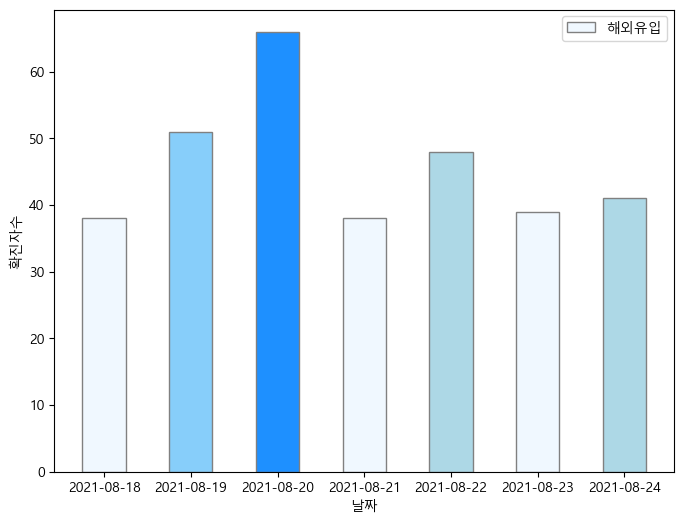

In [66]:
plt.figure(figsize=(8,6))
plt.bar(df['TodayDate'], df['oversea'], color = colors2, width = 0.5, 
        edgecolor = 'gray', label = '해외유입')
plt.xlabel('날짜')
plt.ylabel('확진자수')
plt.legend()
plt.show()